# Exemplar LSTM

## Data

In [1]:
import os
import sys
import pandas as pd
cwd = os.getcwd()
ind = cwd.rfind('\\')
addpath = cwd[:ind] + '\\Data'
sys.path.append(addpath)
tgt_fil = os.listdir(addpath)[0]
dataset = pd.read_csv(addpath + '\\' + tgt_fil)
import matplotlib.pyplot as plt

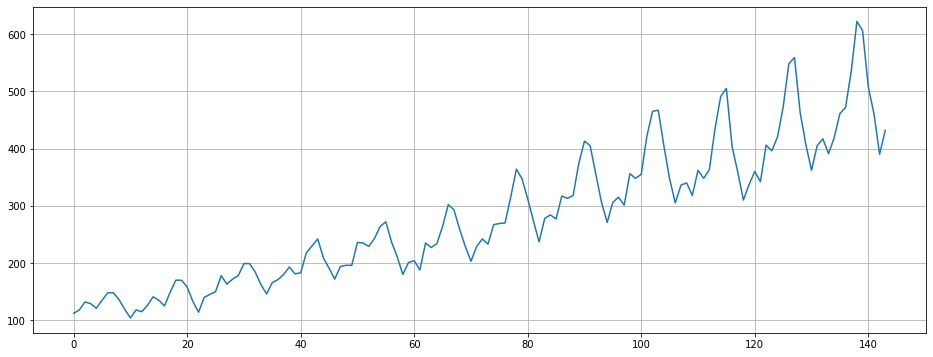

In [2]:
plt.rcParams['figure.figsize'] = (16,6)
plt.plot(dataset.Passengers)
plt.grid()
plt.show()

## LSTM Network

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


### preprocess data

In [4]:
tf.random.set_seed(42)

In [5]:
datavals = dataset['Passengers'].values.astype('float32').reshape(-1,1)

### scale data

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
datavals = scaler.fit_transform(datavals)

### train and test sets

In [7]:
train_size = int(len(datavals)*2/3)
test_size = len(datavals) - train_size
train, test = datavals[0:train_size], datavals[train_size:len(datavals),:]
print (len(train), len(test))

96 48


### data formatting

In [8]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for ind in range(len(dataset) - look_back - 1):
        a = dataset[ind:(ind+look_back),0]
        dataX.append(a)
        dataY.append(dataset[ind + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 1
train_x, train_y = create_dataset (train, look_back)
test_x, test_y = create_dataset (test, look_back)

In [10]:
np.column_stack((train_x, train_y))[:5]

array([[0.01544401, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984557]], dtype=float32)

LSTM expects the data in the shape of <i>[samples, time steps, features]</i><br>
hence the following reshaping

In [11]:
train_x_shaped = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x_shaped = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
train_x_shaped.shape

(94, 1, 1)

In [12]:
train_x.shape

(94, 1)

### Model creation

In [13]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

### training

In [14]:
history = model.fit(train_x_shaped, train_y, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 1ms/step - loss: 0.0666
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 3/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0619
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0575
Epoch 6/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0555
Epoch 7/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 8/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0515
Epoch 9/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 10/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 11/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0463
Epoch 12/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 13/1000
3/3 [==============================

3/3 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 104/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 105/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 106/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 107/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 108/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 109/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 110/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 111/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 112/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 113/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 114/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 115/1000
3/3 [=======================

3/3 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 205/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 206/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 207/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 208/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 209/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 210/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 211/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 212/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 213/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 214/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 215/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 216/1000
3/3 [=======================

3/3 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 306/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 307/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 308/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 309/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 310/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 311/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 312/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 313/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 314/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 315/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 316/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 317/1000
3/3 [=======================

3/3 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 407/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 408/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 409/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 410/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 411/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 412/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 413/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 414/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 415/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 416/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 417/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 418/1000
3/3 [=======================

3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 508/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 509/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 510/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 511/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 512/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 513/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 514/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 515/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 516/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 517/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 518/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 519/1000
3/3 [=======================

3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 609/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 610/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0019
Epoch 611/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 612/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 613/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 614/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 615/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 616/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 617/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 618/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 619/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 620/1000
3/3 [====================

Epoch 709/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 710/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 711/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 712/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 713/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 714/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 715/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 716/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 717/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 718/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 719/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 720/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 721/1000
3/3 [========

3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 810/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 811/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 812/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 813/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 814/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 815/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 816/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 817/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 818/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 819/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 820/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 821/1000
3/3 [=======================

3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 911/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 912/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 913/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 914/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 915/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0019
Epoch 916/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 917/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 918/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 919/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 920/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 921/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 922/1000
3/3 [====================

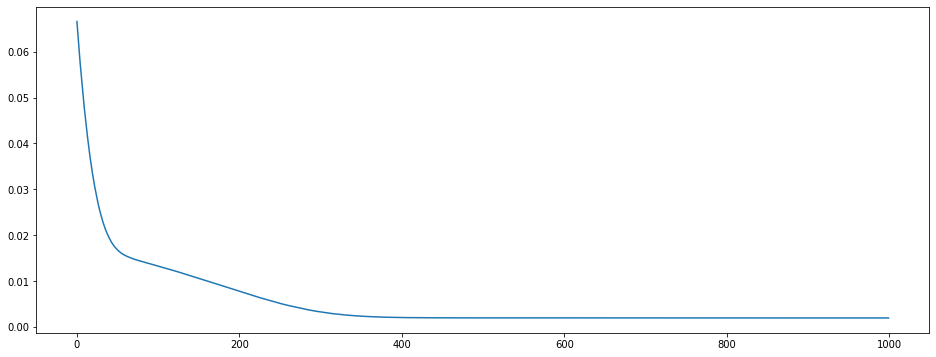

In [15]:
plt.plot(history.history['loss'])

### view predictions

In [16]:
trainpredict = model.predict(train_x_shaped)
testpredict = model.predict(test_x_shaped)
# invert back to actual values
trainpredict = scaler.inverse_transform(trainpredict)
train_y_inv = scaler.inverse_transform(train_y.reshape(-1,1))
testpredict = scaler.inverse_transform(testpredict)
test_y_inv = scaler.inverse_transform(test_y.reshape(-1,1))
# find rmse
trainscore = np.sqrt(mean_squared_error(train_y_inv, trainpredict[:,0]))
print ('Train score: {:.2f} RMSE'.format(trainscore))
testscore = np.sqrt(mean_squared_error(test_y_inv, testpredict[:,0]))
print ('Test score: {:.2f} RMSE'.format(testscore))


Train score: 22.74 RMSE
Test score: 48.81 RMSE


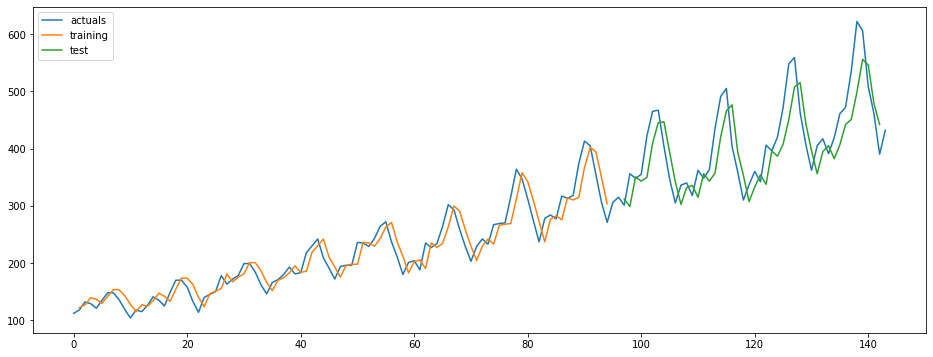

In [17]:
#shift train predictions for plotting
trainpredictplot = np.empty_like(datavals)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(trainpredict)+look_back, :] = trainpredict
#shift test predictions for plotting
testpredictplot = np.empty_like(datavals)
testpredictplot[:,:] = np.nan
testpredictplot[len(trainpredict)+(look_back*2) + 1:len(datavals)-1,:] = testpredict
# plot baseline and predictions
plt.plot (scaler.inverse_transform(datavals))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.legend(['actuals', 'training', 'test'])
plt.show()